# <font color=green>OSA case study</font>
## <font color=dark>Applying simple Principal Component Analysis (PCA) <font>

* ### PRDL & MLLB courses ETSIT - UPM
---


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Reading OSA Data: We are going to use EXTREME cases to have severe/healthy classes

*  ## OSA_extreme_male.xlsx

In [1]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class.xlsx'
data = pd.read_excel(file)
df_OSA = pd.DataFrame(data)
df_OSA.head()
df_OSA = df_OSA.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df_OSA.set_index('Patient', inplace=True)
df_OSA.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI
Patient,,,,,,,
P0002,1,119,174,56,48.0,Mild,39.305060
P0004,1,78,168,39,42.0,Mild,27.636054
P0005,1,80,173,32,40.0,Healthy,26.729927
P0006,1,109,190,32,42.0,Healthy,30.193906
P0007,1,86,169,39,42.0,Severe,30.110991


In [2]:
df_OSA.head(2)

,Gender,Weight,Height,Age,Cervical,OSA,BMI
Patient,,,,,,,
P0002,1,119,174,56,48.0,Mild,39.305060
P0004,1,78,168,39,42.0,Mild,27.636054


# **Select Data** ("UNSUPERVISED") so : NO IAH nor OSA

In [3]:
df = df_OSA[['Gender','Weight','Height','Age','Cervical','BMI']]


In [4]:
df.head(5)

,Gender,Weight,Height,Age,Cervical,BMI
Patient,,,,,,
P0002,1,119,174,56,48.0,39.305060
P0004,1,78,168,39,42.0,27.636054
P0005,1,80,173,32,40.0,26.729927
P0006,1,109,190,32,42.0,30.193906
P0007,1,86,169,39,42.0,30.110991


<font color=red size=5>Remember the importance of Scaling before PCA!!!:</font>

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)


In [8]:
import numpy as np

# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))


Features means after normalization 
 [-1.1469390616600042e-16, 1.566550913486835e-16, 9.651072592017109e-17, -2.685515851691717e-16, -7.497065085972711e-16, -8.951719505639057e-17]

Standard deviation after normalization 
 [1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0]


* ## **Performing PCA**

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

### LET's try with the same number of components than features
### KNOW what defines the limit
n_components = 6
n_2 = 0.95

pca = PCA(n_components = n_components)
pca_2 = PCA(n_components = n_2)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(X_scaled)
pca_2.fit(X_scaled)

PCA(n_components=0.95)

<font color=red size=5>NOTE:</font>
- ### Display some PCA components
- ### Do you see something strange?

In [21]:
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]




In [10]:
PC3 = pca.components_[2]

<BarContainer object of 6 artists>

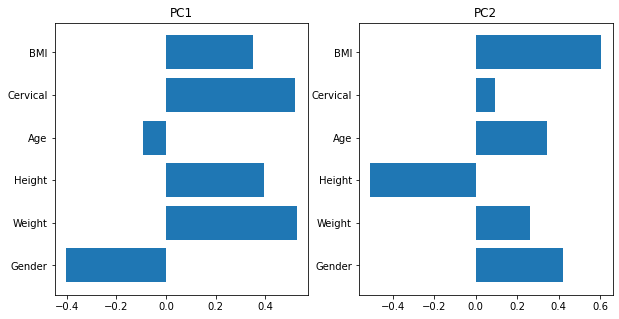

In [17]:
features = df.columns
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)

* ### Cumulative explained variance
        How many dimensions to keep? 

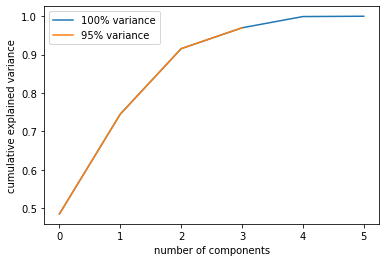

In [18]:

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = '100% variance')

plt.plot(np.cumsum(pca_2.explained_variance_ratio_), label = '95% variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend()

* ### Project data

Text(0, 0.5, 'Second Principal Component')

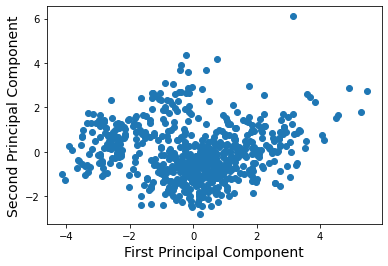

In [19]:
## project data into PC space

Z1 = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
Z2 = pca.transform(X_scaled)[:,1]

plt.scatter(Z1,Z2)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)



# Adding SUPERVISED information: plot in different colors Severe, Mild and Healthy

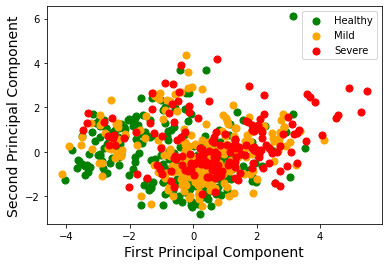

In [23]:
group = df_OSA['OSA']
cdict = {'Severe': 'red', 'Mild': 'orange', 'Healthy': 'green'}


fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()


<font color=red size=4>Understand biplot representation</font>

In [45]:
# This is to plot as a vector the effect
# for every original factor (or variable)
# into the PC1 PC2 space
# Biplot

coeff = np.transpose(pca.components_[0:2, :])

print(coeff)
print(features)

[[-0.40324854  0.42372457]
 [ 0.52760714  0.26481802]
 [ 0.39475728 -0.50719401]
 [-0.09199851  0.34322035]
 [ 0.51975867  0.09491317]
 [ 0.35295213  0.60520609]]
Index(['Gender', 'Weight', 'Height', 'Age', 'Cervical', 'BMI'], dtype='object')


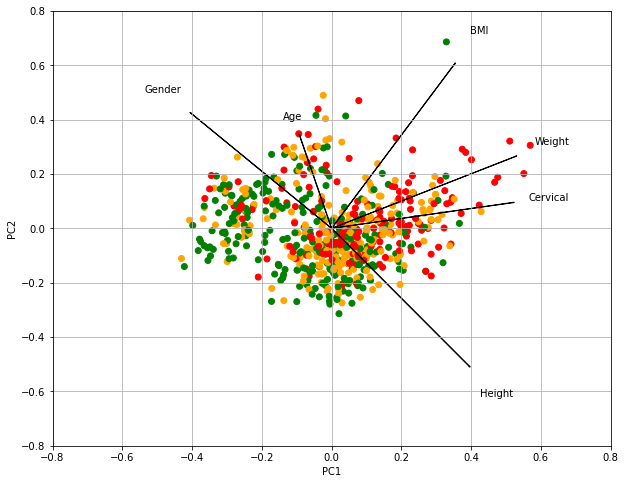

In [46]:
x_new = pca.transform(X_scaled)

color= ['red' if l == 'Severe' else 'orange' if l == 'Mild' else 'green' for l in df_OSA['OSA']]

    

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    
    plot_scale = 1.2
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),6)
plt.show()